In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import requests
import sys
from pywtk.site_lookup import get_3tiersites_from_wkt

### Create bounding polygon for area of interest

In [9]:
min_lng = -75
max_lng = -65
min_lat = 39
max_lat = 49
wkt = "POLYGON(({0} {3},{1} {3},{1} {2},{0} {2},{0} {3}))".format(min_lng, max_lng, min_lat, max_lat)

### Retrieve sites within polygon

In [10]:
site_df = get_3tiersites_from_wkt(wkt)

### Add index to dataframe data

In [11]:
print(site_df.columns)
site_df = site_df.reset_index()
print(site_df.columns)

Index([u'gid', u'fraction_of_usable_area', u'power_curve', u'capacity',
       u'wind_speed', u'capacity_factor', u'the_geom', u'city', u'state',
       u'country', u'elevation', u'point', u'lat', u'lon'],
      dtype='object')
Index([u'site_id', u'gid', u'fraction_of_usable_area', u'power_curve',
       u'capacity', u'wind_speed', u'capacity_factor', u'the_geom', u'city',
       u'state', u'country', u'elevation', u'point', u'lat', u'lon'],
      dtype='object')


### Save dataframe as a csv.  The csv will contain a subset of the metadata to include site_id, lat, lon, capacity

In [12]:
site_df[['site_id', 'lat', 'lon', 'capacity', 'capacity_factor']].to_csv('interesting_sites.csv', index=False)

In [13]:
!head interesting_sites.csv

site_id,lat,lon,capacity,capacity_factor
98853,41.936672,-72.875977,16.0,0.473
100782,41.939423,-72.196167,16.0,0.469
100982,41.962639,-72.212738,16.0,0.476
101179,41.985855,-72.22934,16.0,0.454
101180,41.980415,-72.205414,16.0,0.483
101181,41.974972,-72.181519,16.0,0.488
101379,42.009075,-72.245941,16.0,0.444
101380,42.003639,-72.222015,16.0,0.477
101381,41.998199,-72.19809,16.0,0.492


In [14]:
site_df2=pandas.DataFrame.from_csv('interesting_sites.csv')
site_df2.head()

,lat,lon,capacity,capacity_factor
site_id,,,,
98853,41.936672,-72.875977,16.0,0.473
100782,41.939423,-72.196167,16.0,0.469
100982,41.962639,-72.212738,16.0,0.476
101179,41.985855,-72.229340,16.0,0.454
101180,41.980415,-72.205414,16.0,0.483


In [15]:
max(site_df2['capacity_factor'])

0.65500000000000003

In [16]:
min(site_df2['capacity_factor'])

0.19399999999999998

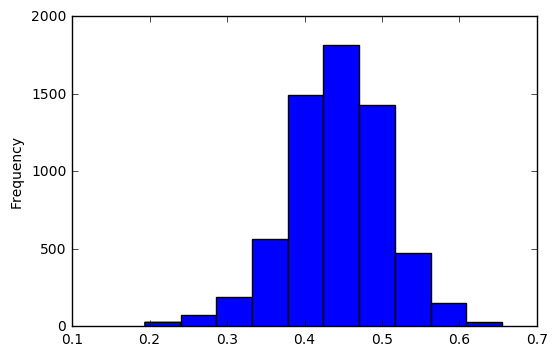

In [18]:
site_df2['capacity_factor'].plot(kind="hist")